# Patient Networks from	Genomic	Data

In [116]:
import matplotlib.pyplot as plt
import networkx
import numpy as np
import pandas as pd

from copy import deepcopy

## Load dataframes

In [117]:
dataframes = []

for dataset in ("Gene", "Methy", "Mirna"):
    dataframe = pd.read_table(f"data/LUNG_{dataset}_Expression.tsv", header=0)

    dataframes.append(dataframe)

dataframes[0].head()

,,TCGA-18-3406-01A-01R-1031-01,TCGA-18-3407-01A-01R-1031-01,TCGA-18-3408-01A-01R-1031-01,TCGA-18-3410-01A-01R-1031-01,TCGA-18-3411-01A-01R-1031-01,TCGA-18-3412-01A-01R-1031-01,TCGA-18-3414-01A-01R-1031-01,TCGA-18-3415-01A-01R-1031-01,TCGA-18-3416-01A-01R-1031-01,...,TCGA-66-2787-01A-01R-1031-01,TCGA-66-2788-01A-01R-1031-01,TCGA-66-2789-01A-01R-1031-01,TCGA-66-2790-01A-01R-1031-01,TCGA-66-2791-01A-01R-1031-01,TCGA-66-2792-01A-01R-1031-01,TCGA-66-2793-01A-01R-1199-01,TCGA-66-2794-01A-01R-1199-01,TCGA-66-2795-01A-02R-1031-01,TCGA-66-2800-01A-01R-1199-01
NTS,-0.806226,-0.382872,0.401741,-1.411283,0.753000,0.736499,0.884528,-0.658622,-1.364281,-0.026033,...,1.034772,-0.702329,-1.199132,0.508934,0.970896,1.229138,0.112034,1.176520,0.344574,NaN
KRT14,1.479097,1.444322,-0.860771,-1.215284,0.393626,0.563601,0.050821,0.637788,-1.426153,-0.384999,...,1.419102,0.598151,-0.381585,0.993165,0.716151,-1.267115,-1.044408,0.583019,-0.377197,NaN
SPRR3,0.126642,1.202567,0.165575,-1.399032,-0.061173,1.229682,0.230877,1.055121,-0.371628,1.080481,...,1.181017,0.221319,-1.700355,-0.028831,0.894141,-0.121553,0.651901,-0.190551,0.994301,NaN
KRT13,1.103173,1.163743,0.068945,-0.861872,-1.101405,1.458346,-0.456045,0.360896,0.478252,1.018959,...,1.074723,0.184191,-0.222527,0.849239,0.838823,0.224248,0.346868,0.069941,-0.816551,NaN
UPK1B,-1.088276,-1.069109,0.674922,-1.130374,-1.070265,1.286183,1.492973,0.932590,0.047729,-1.082025,...,0.942833,0.586808,-0.725825,0.915616,1.189197,0.886122,1.345704,1.339203,1.064178,NaN


## Similarity matrix

### Pearson correlation

In [118]:
correlations = (
    list(map(lambda x: x.corr(method="pearson"), dataframes)),
    list(map(lambda x: x.corr(method="spearman"), dataframes))
)

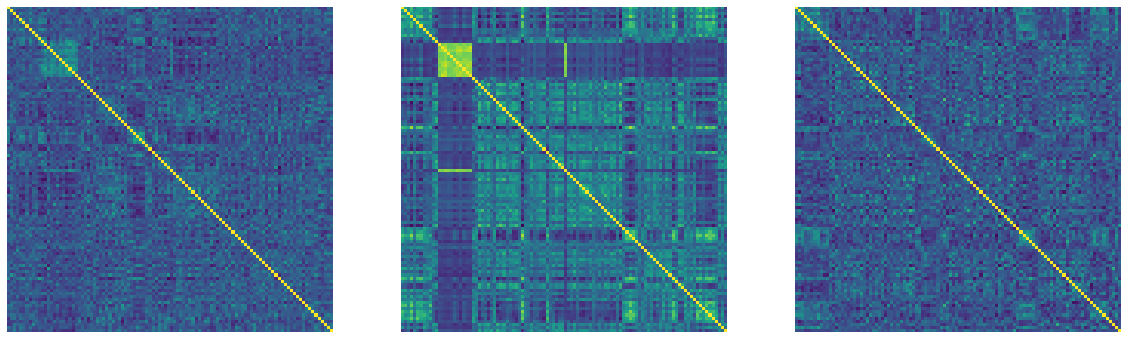

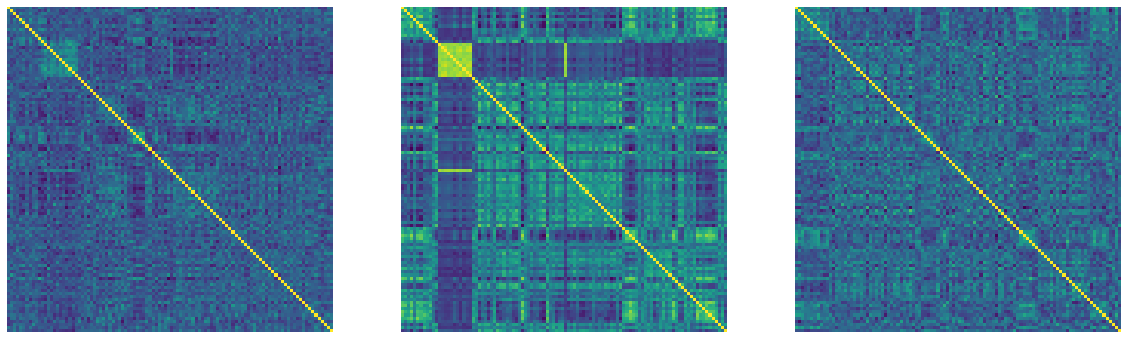

In [119]:
for correlation in correlations:
    figure, axes = plt.subplots(1, 3, sharey=True, figsize=(20, 15))

    for i, matrix in enumerate(correlation):
        axes[i].matshow(matrix)
        axes[i].set_axis_off()

    plt.show()

## Threshold by correlation

### Pearson correlation

In [124]:
threshold = 0.5
thresholded_correlations = deepcopy(correlations)

for i, correlation in enumerate(thresholded_correlations):    
    for j, matrix in enumerate(correlation):
        thresholded_correlations[i][j] = matrix[abs(matrix) >= threshold]

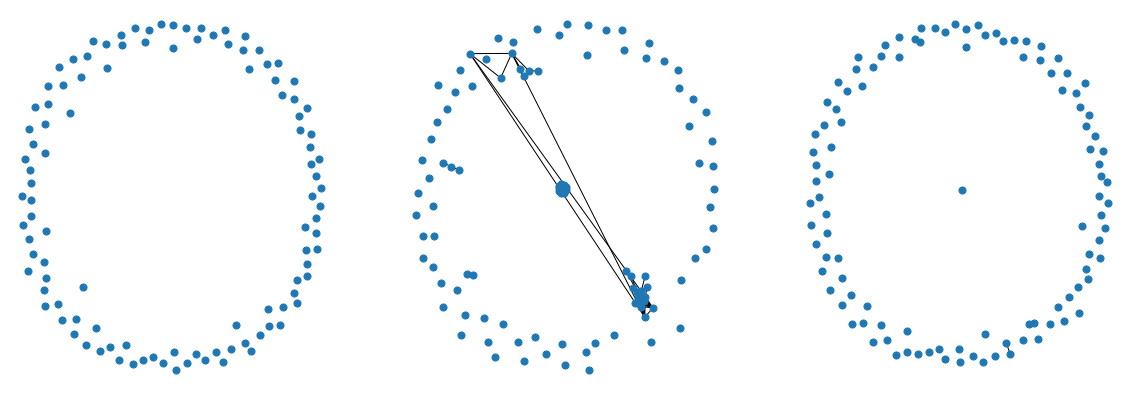

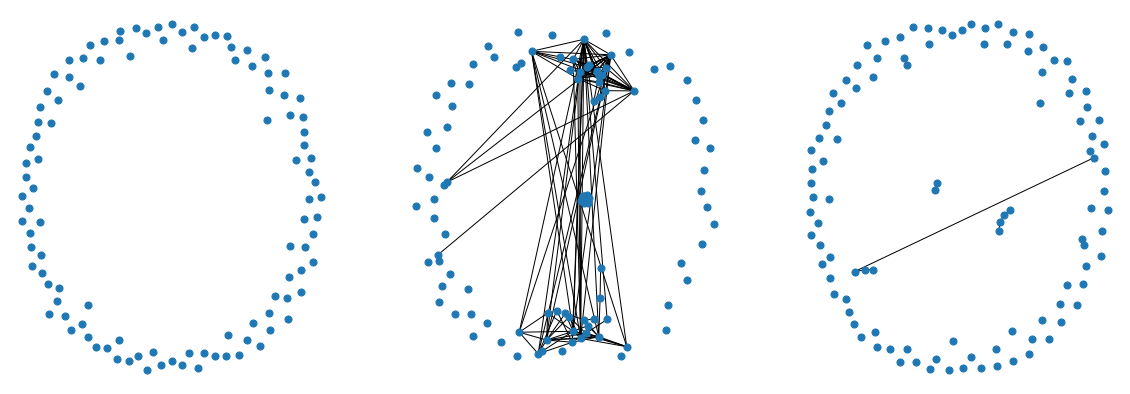

In [125]:
# TODO: Can we use plotly

def generate_network(correlation):
    adj_matrix = np.array(correlation.fillna(0))
    np.fill_diagonal(adj_matrix, 0)

    graph = networkx.from_numpy_array(adj_matrix)

    return graph

for correlation in thresholded_correlations:
    figure, axes = plt.subplots(1, 3, figsize=(20, 7))

    for i, matrix in enumerate(correlation):
        graph = generate_network(matrix)
        networkx.draw(graph, node_size=50, ax=axes[i])

        axes[i].set_axis_off()

    plt.show()

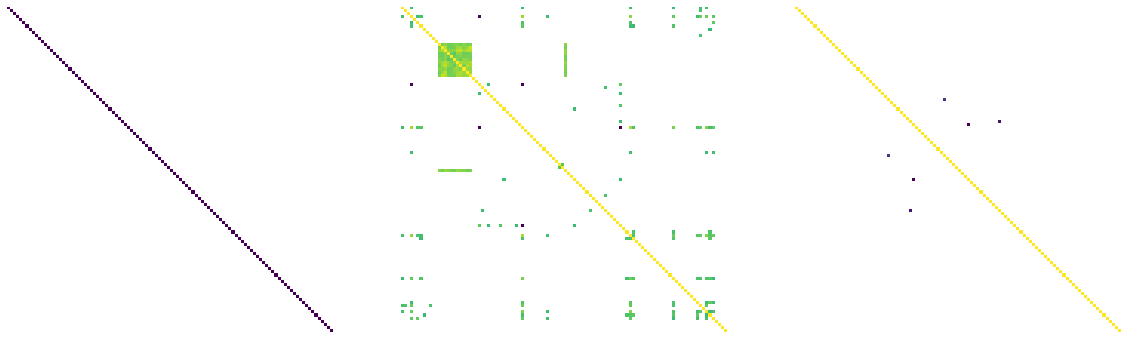

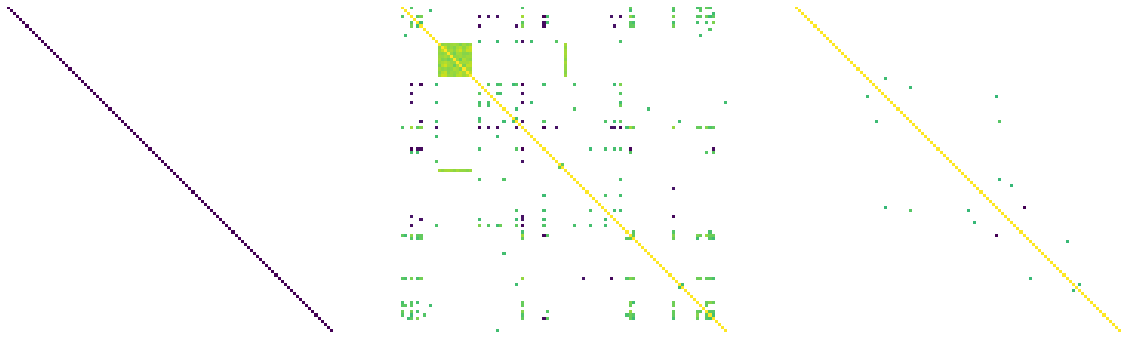

In [126]:
for correlation in thresholded_correlations:
    figure, axes = plt.subplots(1, 3, sharey=True, figsize=(20, 15))

    for i, matrix in enumerate(correlation):
        axes[i].matshow(matrix)
        axes[i].set_axis_off()

plt.show()

In [131]:
statistics = pd.DataFrame()

# TODO: Should statistics be calculated for both Spearman and Pearson?

for i in range(0, 50, 1):
    i /= 100

    matrix = correlations[0][0][abs(correlations[0][0]) >= i]
    network = generate_network(matrix)

    line = pd.DataFrame({
        "Correlation method": "Spearman",
        "Threshold": [i],
        # TODO: Should we count only nodes with non-zero degree?
        "Number of nodes": [network.number_of_nodes()],
        "Number of edges": [network.number_of_edges()],
        "Average degree": [np.mean(list(dict(network.degree()).values()))],
        "Average clustering": [networkx.average_clustering(network)]
    })

    statistics = pd.concat([statistics, line])

display(statistics)

,Correlation method,Threshold,Number of nodes,Number of edges,Average degree,Average clustering
0,Spearman,0.00,107,5565,104.018692,0.990654
0,Spearman,0.01,107,5182,96.859813,0.922875
0,Spearman,0.02,107,4780,89.345794,0.853924
0,Spearman,0.03,107,4417,82.560748,0.792300
0,Spearman,0.04,107,4080,76.261682,0.737472
0,Spearman,0.05,107,3706,69.271028,0.679120
0,Spearman,0.06,107,3381,63.196262,0.628586
0,Spearman,0.07,107,3061,57.214953,0.582278
0,Spearman,0.08,107,2738,51.177570,0.536232
0,Spearman,0.09,107,2462,46.018692,0.503292
